In [135]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [137]:
data = pandas.read_csv('marvel_clean.csv')
data.columns

Index(['Title', 'Distributor', 'ReleaseDateUS', 'Budget',
       'OpeningWeekendNorthAmerica', 'NorthAmerica', 'OtherTerritories',
       'Worldwide'],
      dtype='object')

In [139]:
data

,Title,Distributor,ReleaseDateUS,Budget,OpeningWeekendNorthAmerica,NorthAmerica,OtherTerritories,Worldwide
0,Howard the Duck,Universal Pictures,8/1/1986,37000000,5070136,16295774,21667000,37962774
1,Blade,New Line Cinema,8/21/1998,45000000,17073856,70087718,61095812,131183530
2,X-Men,20th Century Fox,7/14/2000,75000000,54471475,157299717,139039810,296339527
3,Blade II,New Line Cinema,3/22/2002,54000000,32528016,82348319,72661713,155010032
4,Spider-Man,Sony Pictures,5/3/2002,139000000,114844116,403706375,418002176,821708551
...,...,...,...,...,...,...,...,...
59,Black Widow,Walt Disney Studios Motion Pictures,7/9/2021,200000000,80366312,183651665,195979696,379631351
60,Shang-Chi and the Legend of the Ten Rings,Walt Disney Studios Motion Pictures,9/3/2021,150000000,75388688,224543292,207700000,432243292
61,Venom: Let There Be Carnage,Sony Pictures,10/1/2021,110000000,90033210,213550366,288500000,502050366
62,Eternals,Walt Disney Studios Motion Pictures,11/5/2021,200000000,85021497,164870234,237194665,402064899


## Release of Marvel Movies

In [138]:
data['Release Date'] = data['ReleaseDateUS'].dt.strftime('%Y-%m-%d')
# Python datetime format code: %m is the month number
# release_average = data.groupby(['Release Date'])

AttributeError: Can only use .dt accessor with datetimelike values

## Which distributor released more movies?

In [116]:
data[['Title','Distributor']]

,Title,Distributor
0,Howard the Duck,Universal Pictures
1,Blade,New Line Cinema
2,X-Men,20th Century Fox
3,Blade II,New Line Cinema
4,Spider-Man,Sony Pictures
...,...,...
59,Black Widow,Walt Disney Studios Motion Pictures
60,Shang-Chi and the Legend of the Ten Rings,Walt Disney Studios Motion Pictures
61,Venom: Let There Be Carnage,Sony Pictures
62,Eternals,Walt Disney Studios Motion Pictures


In [117]:
distributor = data.groupby(['Distributor']).count()
print(distributor.index)
distributor['Title'][0]
# print('2:', data['Title'])

Index(['20th Century Fox', '20th Century Studios', 'IMAX Entertainment',
       'Lionsgate Films', 'New Line Cinema', 'Paramount Pictures',
       'Sony Pictures', 'Universal Pictures',
       'Walt Disney Studios Motion Pictures'],
      dtype='object', name='Distributor')


17

<BarContainer object of 9 artists>

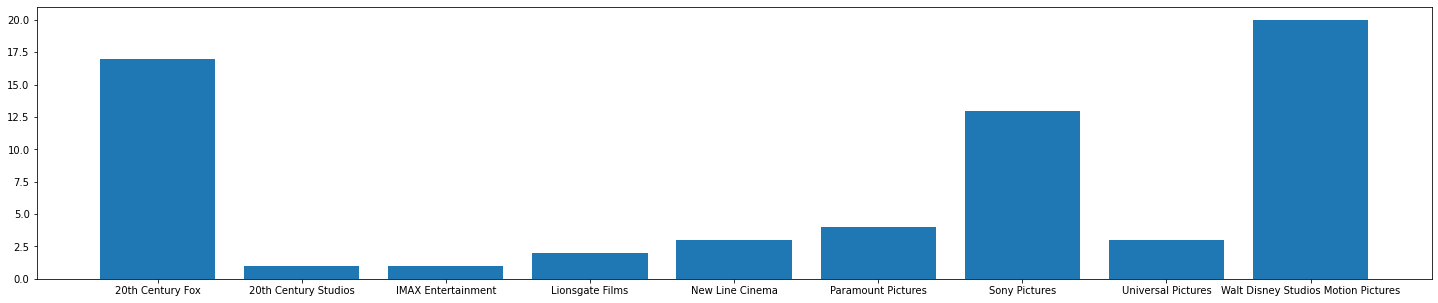

In [118]:
plt.figure(figsize = (25,5))
plt.bar(distributor.index, distributor["Title"])

In [119]:
for i in range(len(distributor.index)):
    avg = data[(data['Distributor'] == str(distributor.index[i]))]['OpeningWeekendNorthAmerica'].mean()
    print(distributor.index[i], ': ', avg)

20th Century Fox :  68514329.76470588
20th Century Studios :  7037017.0
IMAX Entertainment :  1500000.0
Lionsgate Films :  9052989.0
New Line Cinema :  21887714.333333332
Paramount Pictures :  89380752.5
Sony Pictures :  96202436.92307693
Universal Pictures :  40870868.666666664
Walt Disney Studios Motion Pictures :  139083503.7


## Average Revenue Collected by each Distributor on the Opening Weekend in USA

<BarContainer object of 9 artists>

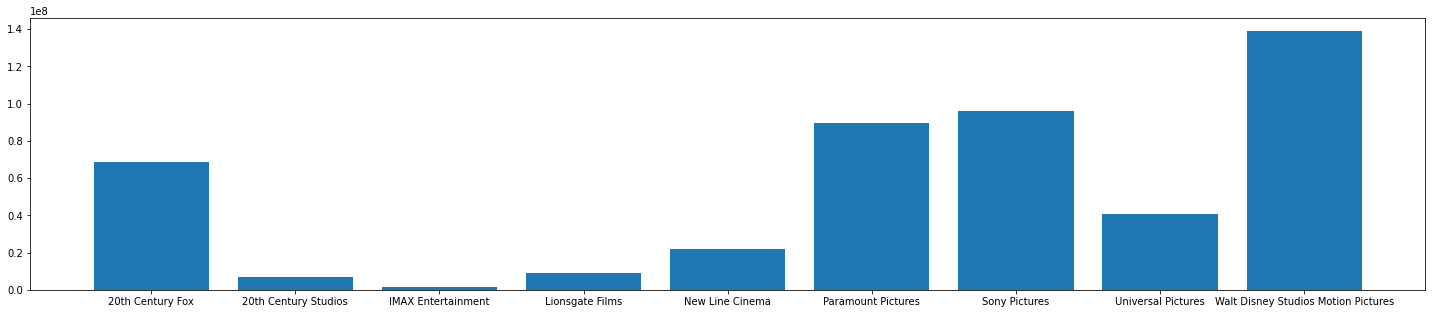

In [120]:
open_week_us = data.groupby(['Distributor'])['OpeningWeekendNorthAmerica'].mean()
plt.figure(figsize = (25,5))
plt.bar(open_week_us.index, open_week_us)

In [121]:
open_week_us

Distributor
20th Century Fox                       6.851433e+07
20th Century Studios                   7.037017e+06
IMAX Entertainment                     1.500000e+06
Lionsgate Films                        9.052989e+06
New Line Cinema                        2.188771e+07
Paramount Pictures                     8.938075e+07
Sony Pictures                          9.620244e+07
Universal Pictures                     4.087087e+07
Walt Disney Studios Motion Pictures    1.390835e+08
Name: OpeningWeekendNorthAmerica, dtype: float64

## Average Revenue Generated by each Distributor from North America

<BarContainer object of 9 artists>

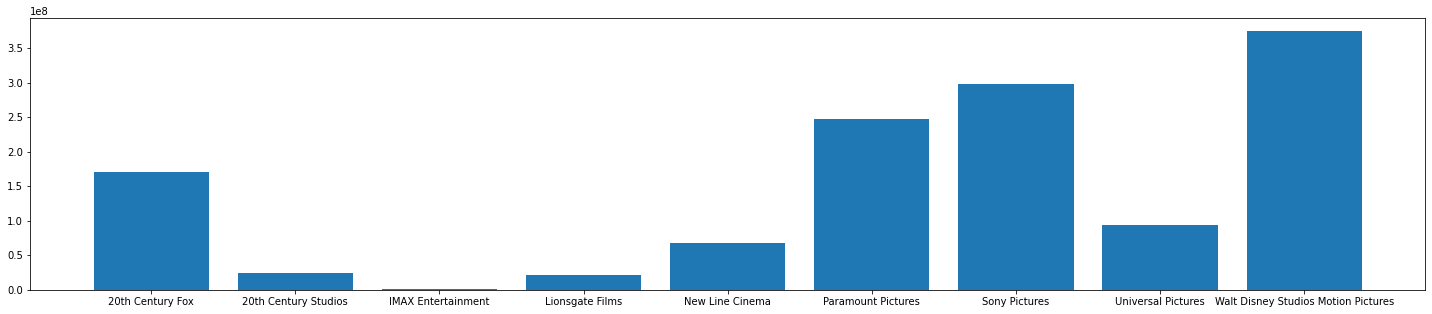

In [122]:
rev_na = data.groupby(['Distributor'])['NorthAmerica'].mean()
plt.figure(figsize = (25,5))
plt.bar(rev_na.index, rev_na)

In [123]:
rev_na

Distributor
20th Century Fox                       1.708407e+08
20th Century Studios                   2.385557e+07
IMAX Entertainment                     1.521787e+06
Lionsgate Films                        2.093058e+07
New Line Cinema                        6.828265e+07
Paramount Pictures                     2.471326e+08
Sony Pictures                          2.975956e+08
Universal Pictures                     9.442664e+07
Walt Disney Studios Motion Pictures    3.746401e+08
Name: NorthAmerica, dtype: float64

## Average Revenue Generated by each Distributor from Other Territories

<BarContainer object of 9 artists>

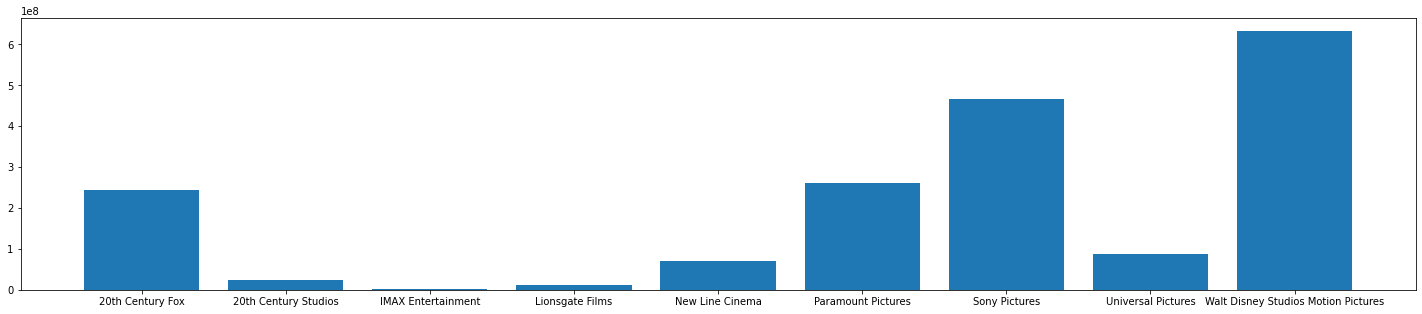

In [125]:
rev_terri = data.groupby(['Distributor'])['OtherTerritories'].mean()
plt.figure(figsize = (25,5))
plt.bar(rev_terri.index, rev_terri)

In [126]:
rev_terri

Distributor
20th Century Fox                       2.450623e+08
20th Century Studios                   2.481950e+07
IMAX Entertainment                     1.330495e+06
Lionsgate Films                        1.146949e+07
New Line Cinema                        7.008366e+07
Paramount Pictures                     2.601183e+08
Sony Pictures                          4.660114e+08
Universal Pictures                     8.782363e+07
Walt Disney Studios Motion Pictures    6.330361e+08
Name: OtherTerritories, dtype: float64

## Average Revenue Generated by each Distributor from the World

<BarContainer object of 9 artists>

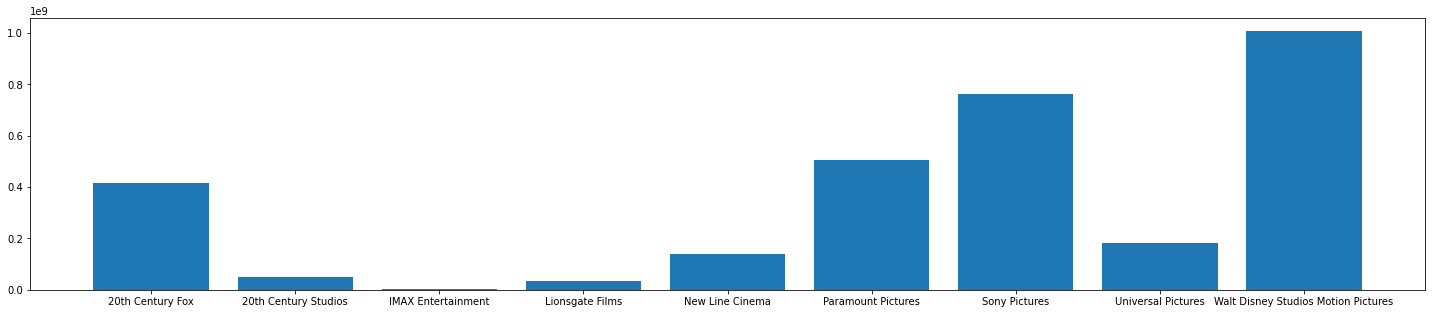

In [128]:
rev_world = data.groupby(['Distributor'])['Worldwide'].mean()
plt.figure(figsize = (25,5))
plt.bar(rev_world.index, rev_world)

In [129]:
rev_world

Distributor
20th Century Fox                       4.159034e+08
20th Century Studios                   4.867507e+07
IMAX Entertainment                     2.852282e+06
Lionsgate Films                        3.240007e+07
New Line Cinema                        1.383663e+08
Paramount Pictures                     5.072510e+08
Sony Pictures                          7.636070e+08
Universal Pictures                     1.822503e+08
Walt Disney Studios Motion Pictures    1.007753e+09
Name: Worldwide, dtype: float64